## Be Heart Smart EDA on cleaned data connected to Db

In [57]:
# Import our dependencies
import pandas as pd
import numpy as np
import datetime as dt
import matplotlib.pyplot as plt
import numpy as np
from sqlalchemy import create_engine
# Import Username,Password and Database_name
from config import Username,Password,DBname
print("All neccessary libraries imported")

All neccessary libraries imported


In [58]:
%matplotlib notebook

## Create Connection

In [59]:
# The create_engine() function produces an Engine object based on a URL
engine = create_engine('postgresql+psycopg2://postgres:'+ Password + '@localhost:5432/' + DBname)
connection = engine.connect()

### Create a dataframe from the table in database

In [60]:
# Create cardio dataframe from cardio data cleaned table in the database
cardio_df = pd.read_sql("SELECT * FROM cardio_cleaned",connection)
cardio_df.head(20)

,id,age,gender,height,weight,systolic_bp,diastolic_bp,cholesterol,glucose,smoker,alcohol_intake,active,cardio
0,86650.0,51.0,1.0,171.0,29.00,110.0,70.0,2.0,1.0,0.0,0.0,1.0,1.0
1,26503.0,49.0,1.0,160.0,30.00,120.0,80.0,1.0,1.0,0.0,0.0,1.0,1.0
2,59853.0,58.0,1.0,143.0,30.00,103.0,61.0,2.0,1.0,0.0,0.0,1.0,0.0
3,24167.0,47.0,2.0,170.0,31.00,150.0,90.0,2.0,2.0,0.0,0.0,1.0,1.0
4,31439.0,42.0,1.0,146.0,32.00,100.0,70.0,1.0,1.0,0.0,0.0,0.0,0.0
5,50443.0,54.0,1.0,146.0,32.00,130.0,80.0,1.0,2.0,0.0,0.0,0.0,0.0
6,54851.0,59.0,1.0,154.0,32.00,110.0,60.0,1.0,1.0,0.0,0.0,1.0,0.0
7,68667.0,52.0,1.0,143.0,33.00,100.0,60.0,1.0,1.0,0.0,0.0,1.0,0.0
8,21040.0,62.0,1.0,143.0,34.00,100.0,70.0,1.0,1.0,0.0,0.0,1.0,0.0
9,47872.0,57.0,1.0,153.0,34.00,110.0,70.0,3.0,3.0,0.0,0.0,1.0,1.0


In [61]:
# list of column names
cardio_df.columns

Index(['id', 'age', 'gender', 'height', 'weight', 'systolic_bp',
       'diastolic_bp', 'cholesterol', 'glucose', 'smoker', 'alcohol_intake',
       'active', 'cardio'],
      dtype='object')

In [62]:
# Check the data type
cardio_df.dtypes

id                float64
age               float64
gender            float64
height            float64
weight            float64
systolic_bp       float64
diastolic_bp      float64
cholesterol       float64
glucose           float64
smoker            float64
alcohol_intake    float64
active            float64
cardio            float64
dtype: object

In [63]:
cardio_df = cardio_df.astype(int)
cardio_df.dtypes

id                int64
age               int64
gender            int64
height            int64
weight            int64
systolic_bp       int64
diastolic_bp      int64
cholesterol       int64
glucose           int64
smoker            int64
alcohol_intake    int64
active            int64
cardio            int64
dtype: object

In [64]:
# Checking for null values
cardio_df.count()

id                68297
age               68297
gender            68297
height            68297
weight            68297
systolic_bp       68297
diastolic_bp      68297
cholesterol       68297
glucose           68297
smoker            68297
alcohol_intake    68297
active            68297
cardio            68297
dtype: int64

In [65]:
cardio_df.shape

(68297, 13)

<IPython.core.display.Javascript object>


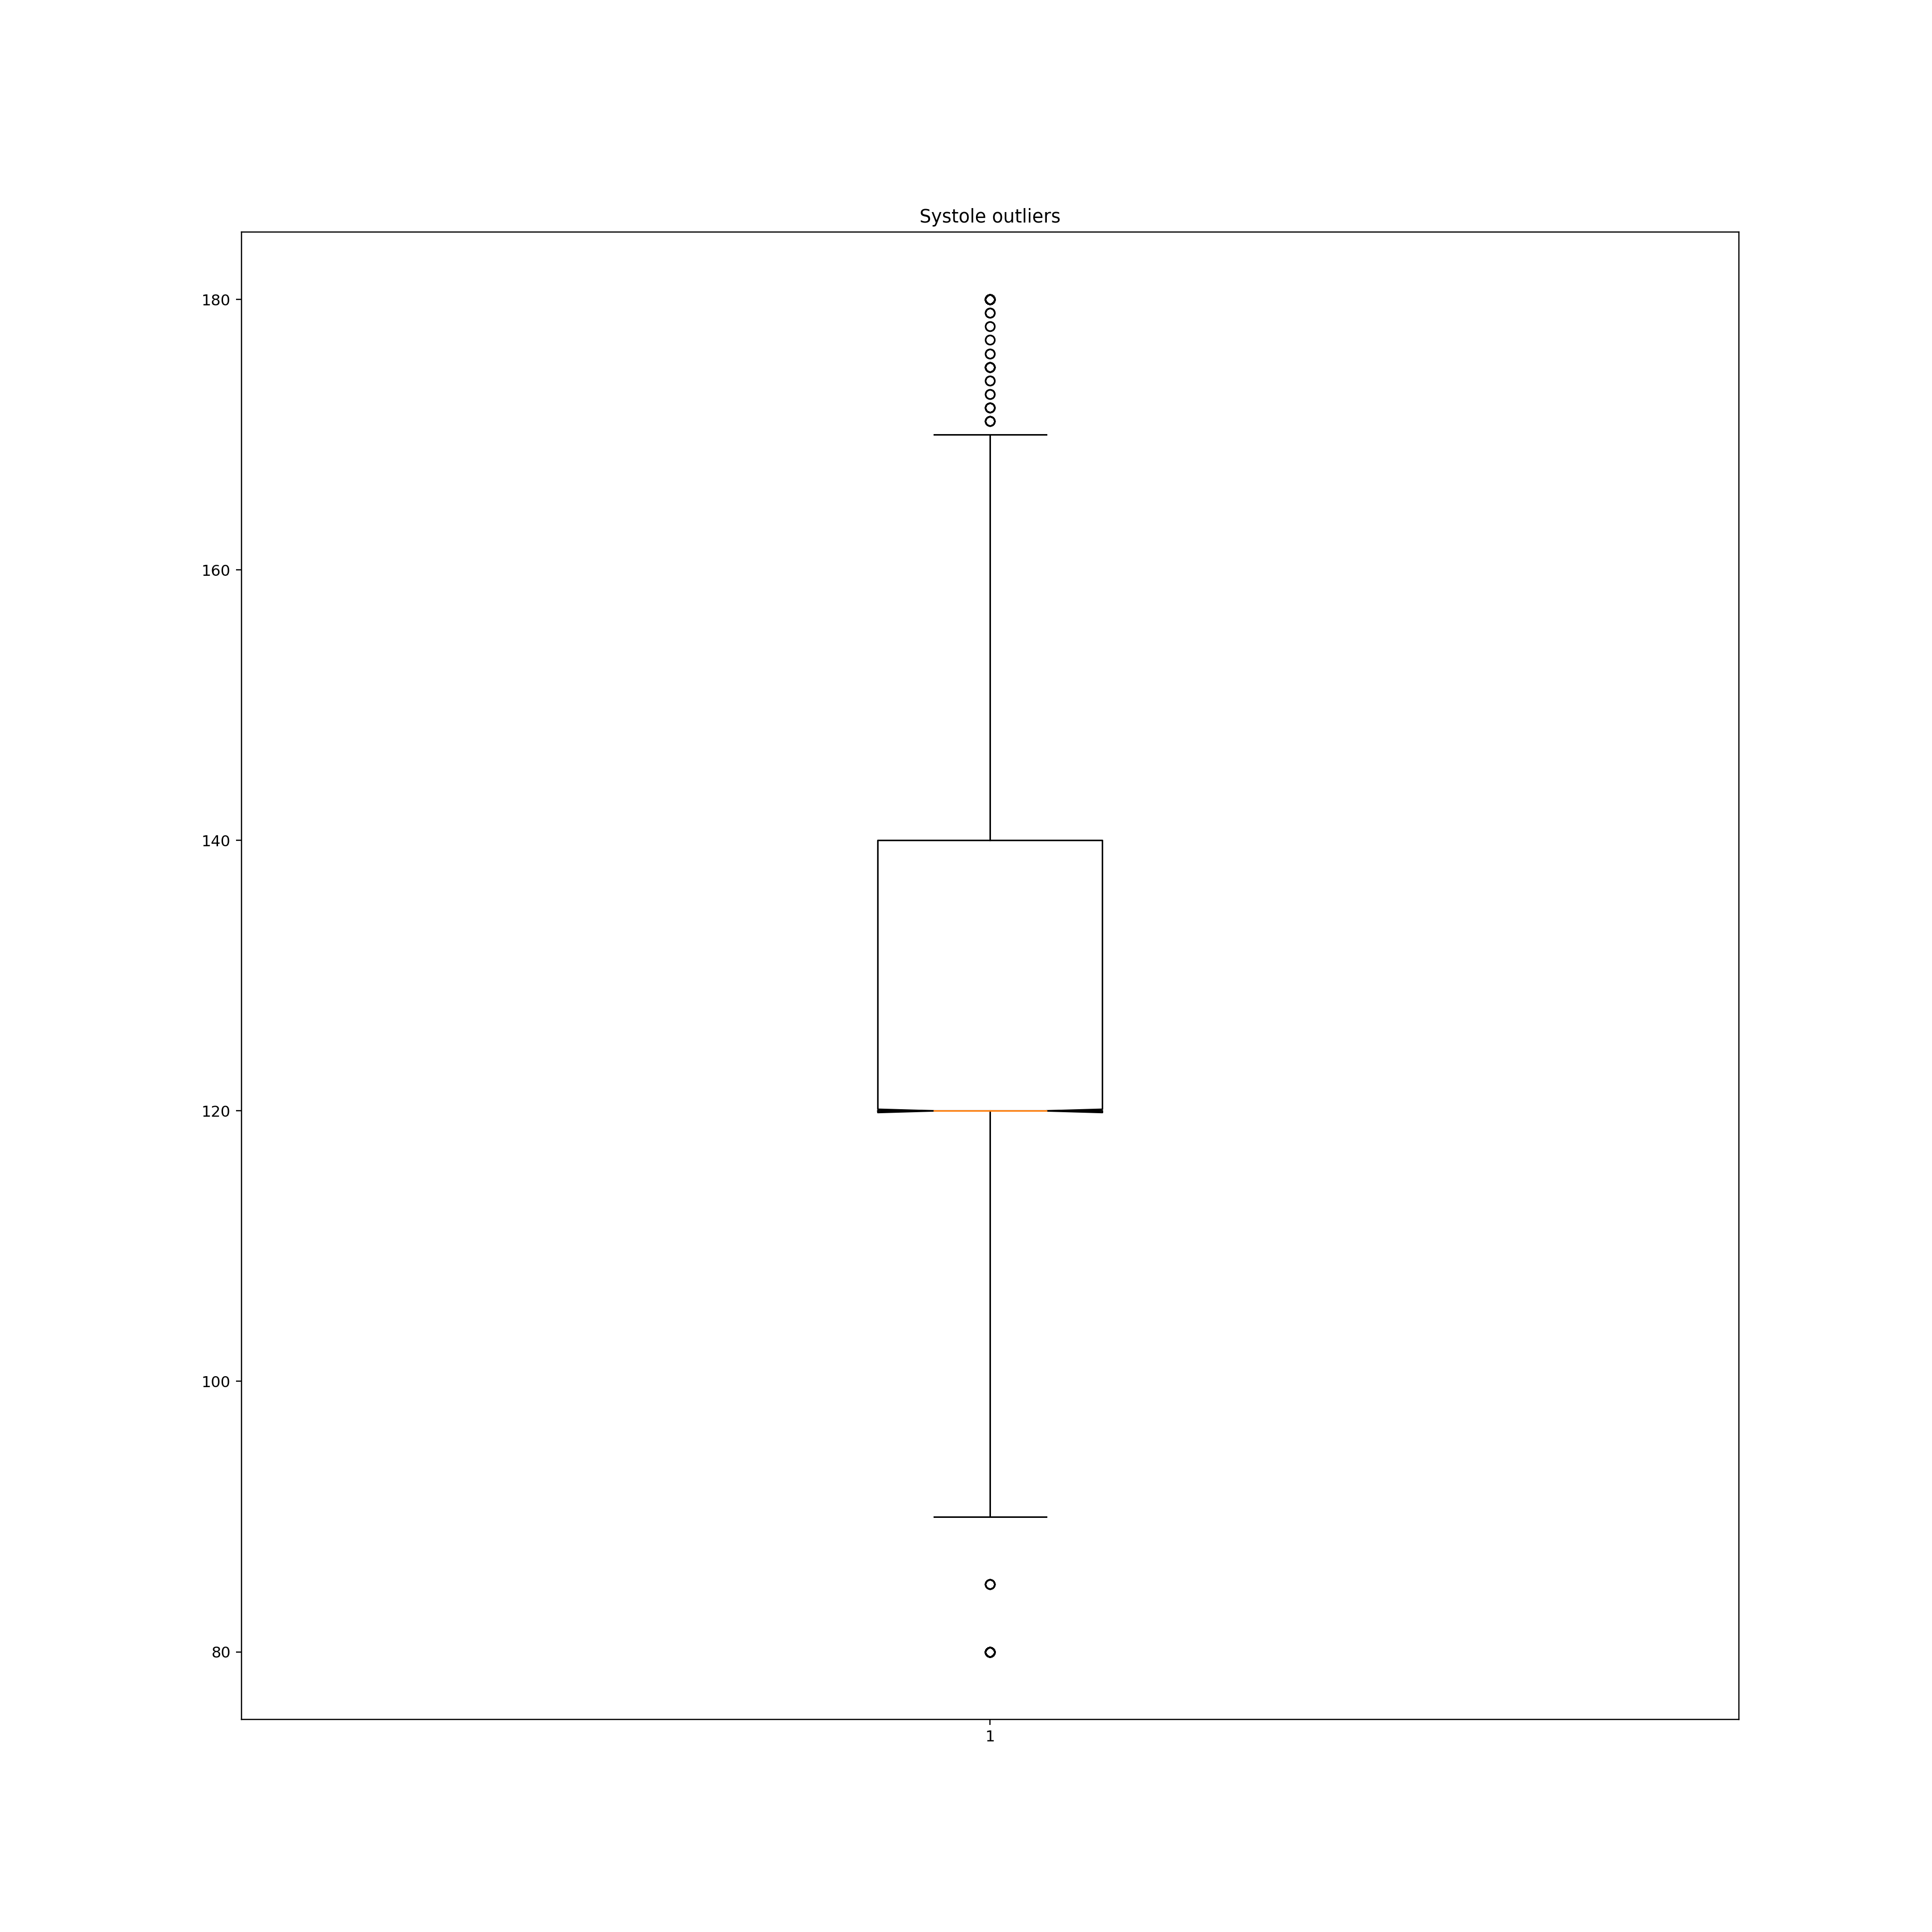

In [66]:
data = [cardio_df["systolic_bp"]]
fig1, ax1 = plt.subplots(figsize = (8,8))
ax1.set_title('Systole outliers')
ax1.boxplot(data, notch= True)
plt.show()

<IPython.core.display.Javascript object>


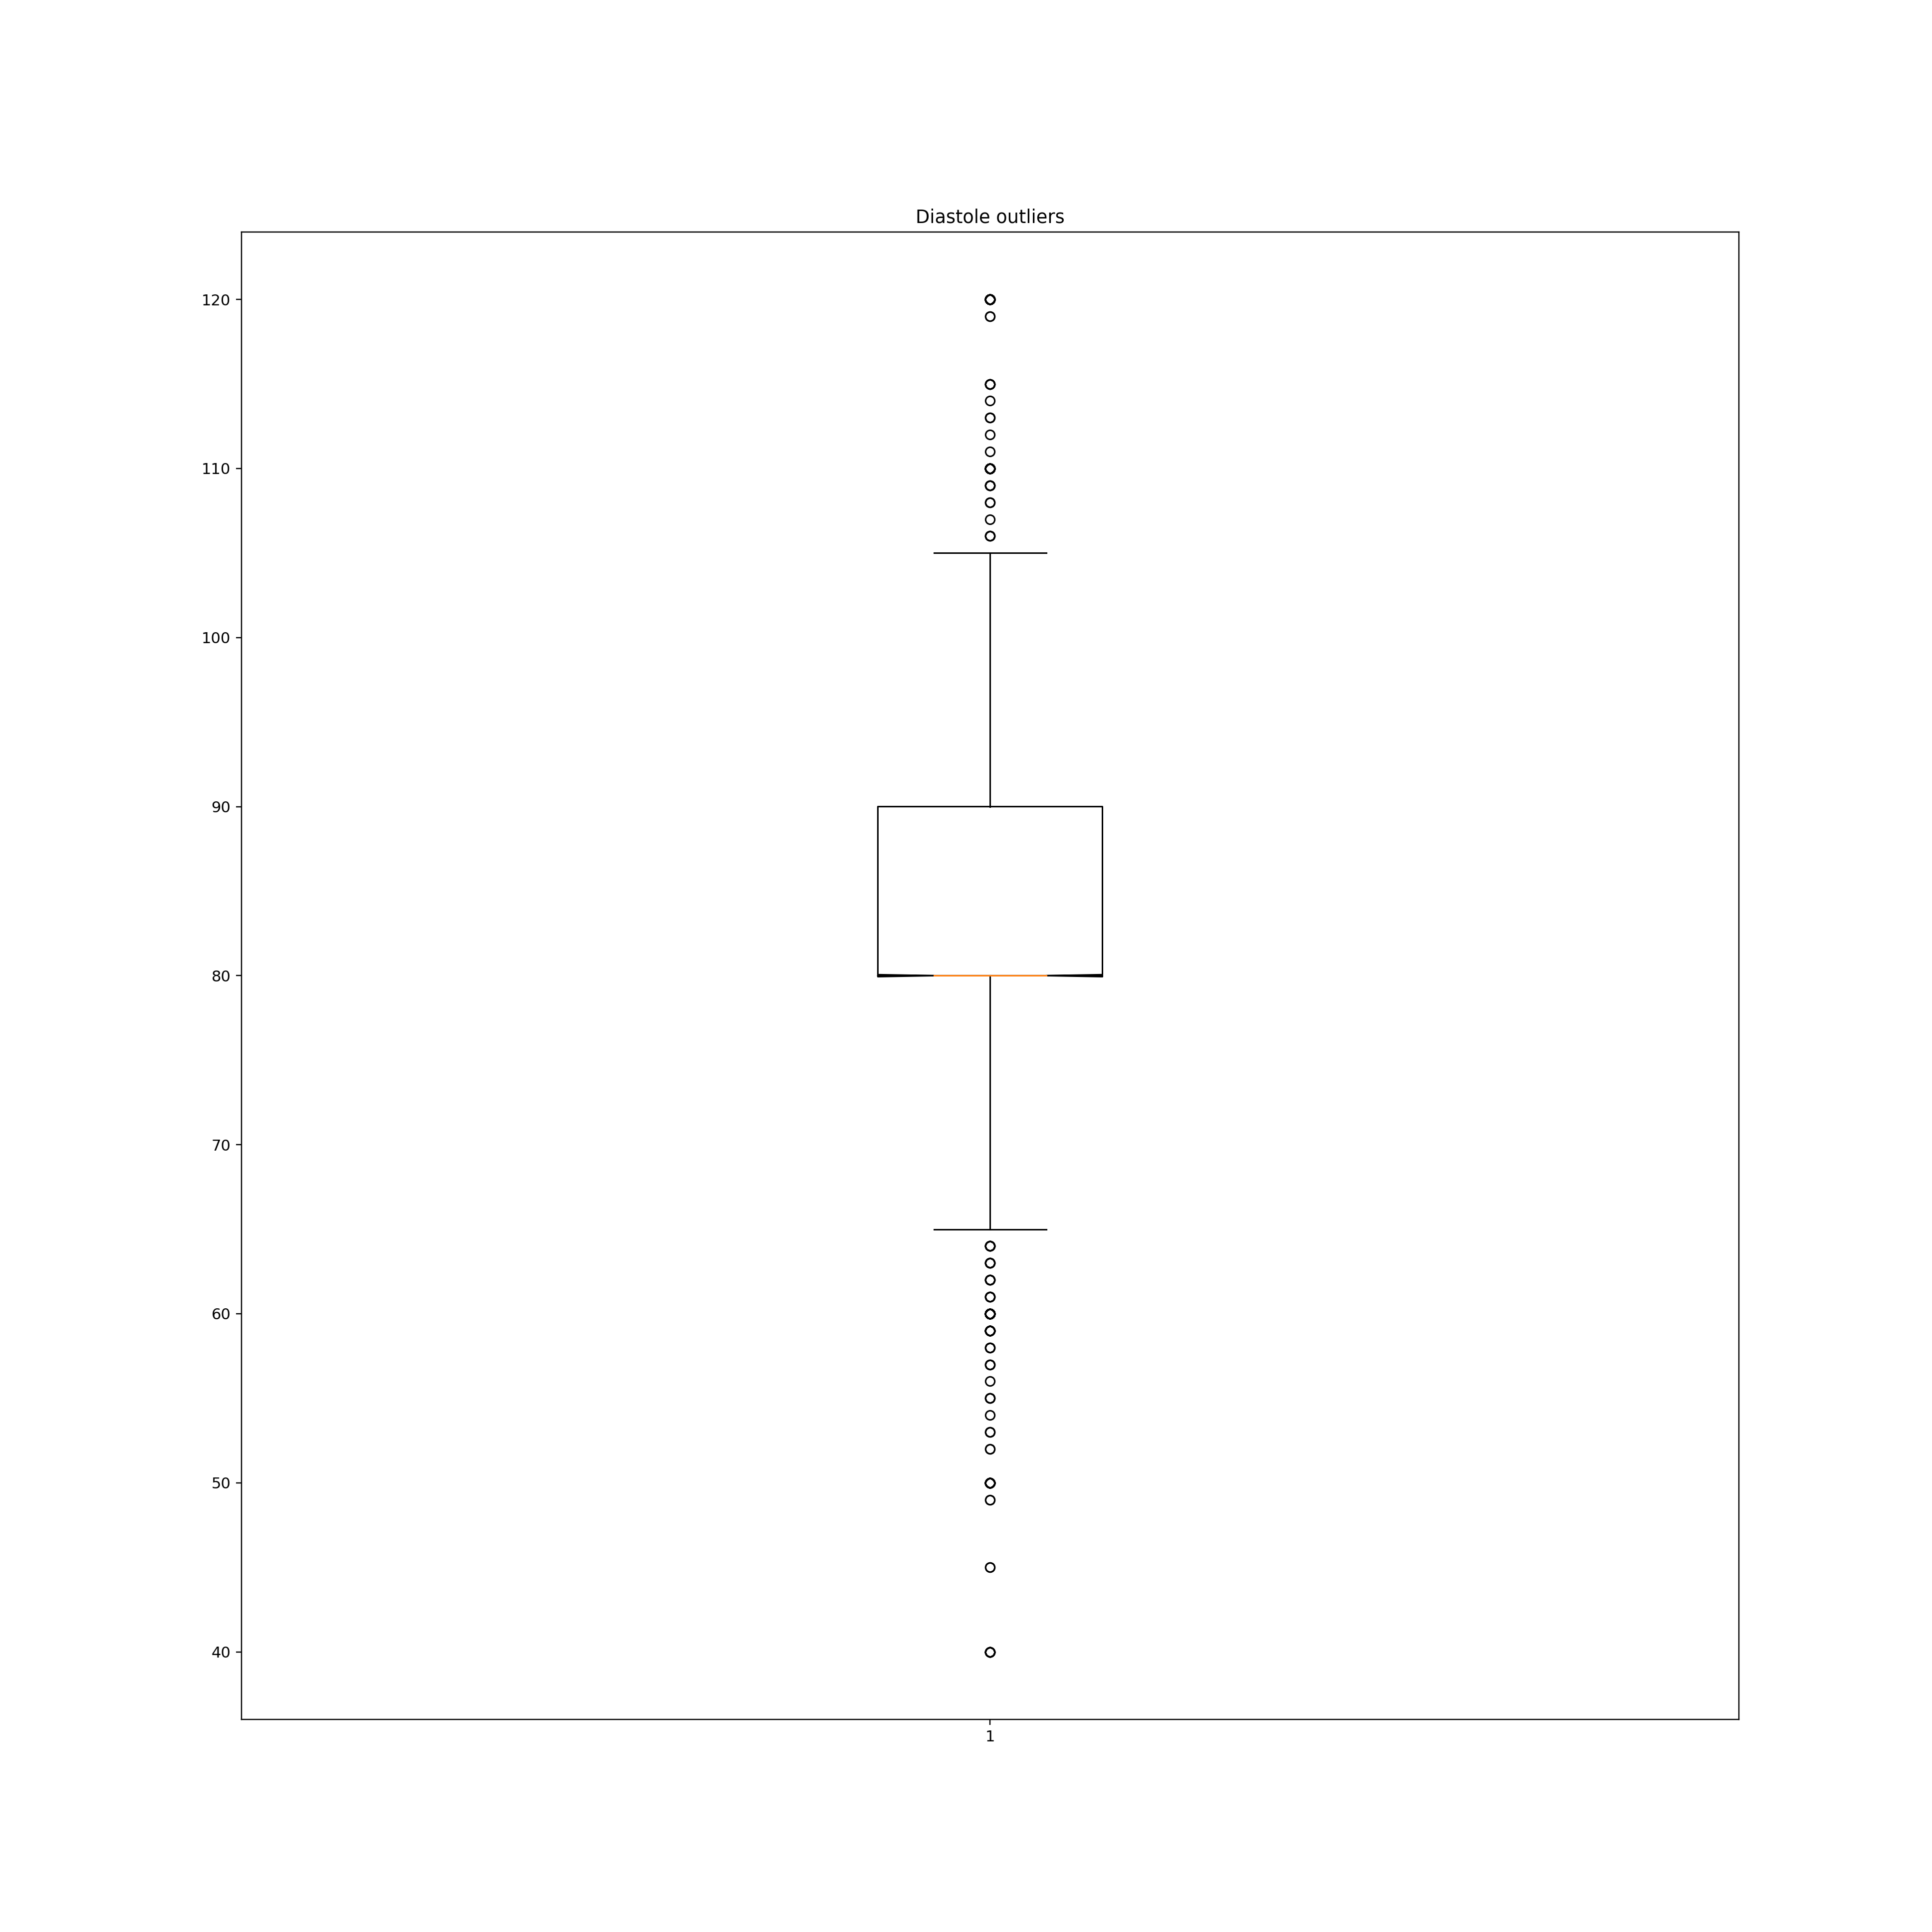

In [68]:
data = [cardio_df["diastolic_bp"]]
fig1, ax1 = plt.subplots(figsize = (8,8))
ax1.set_title('Diastole outliers')
ax1.boxplot(data, notch= True)
plt.show()

<IPython.core.display.Javascript object>


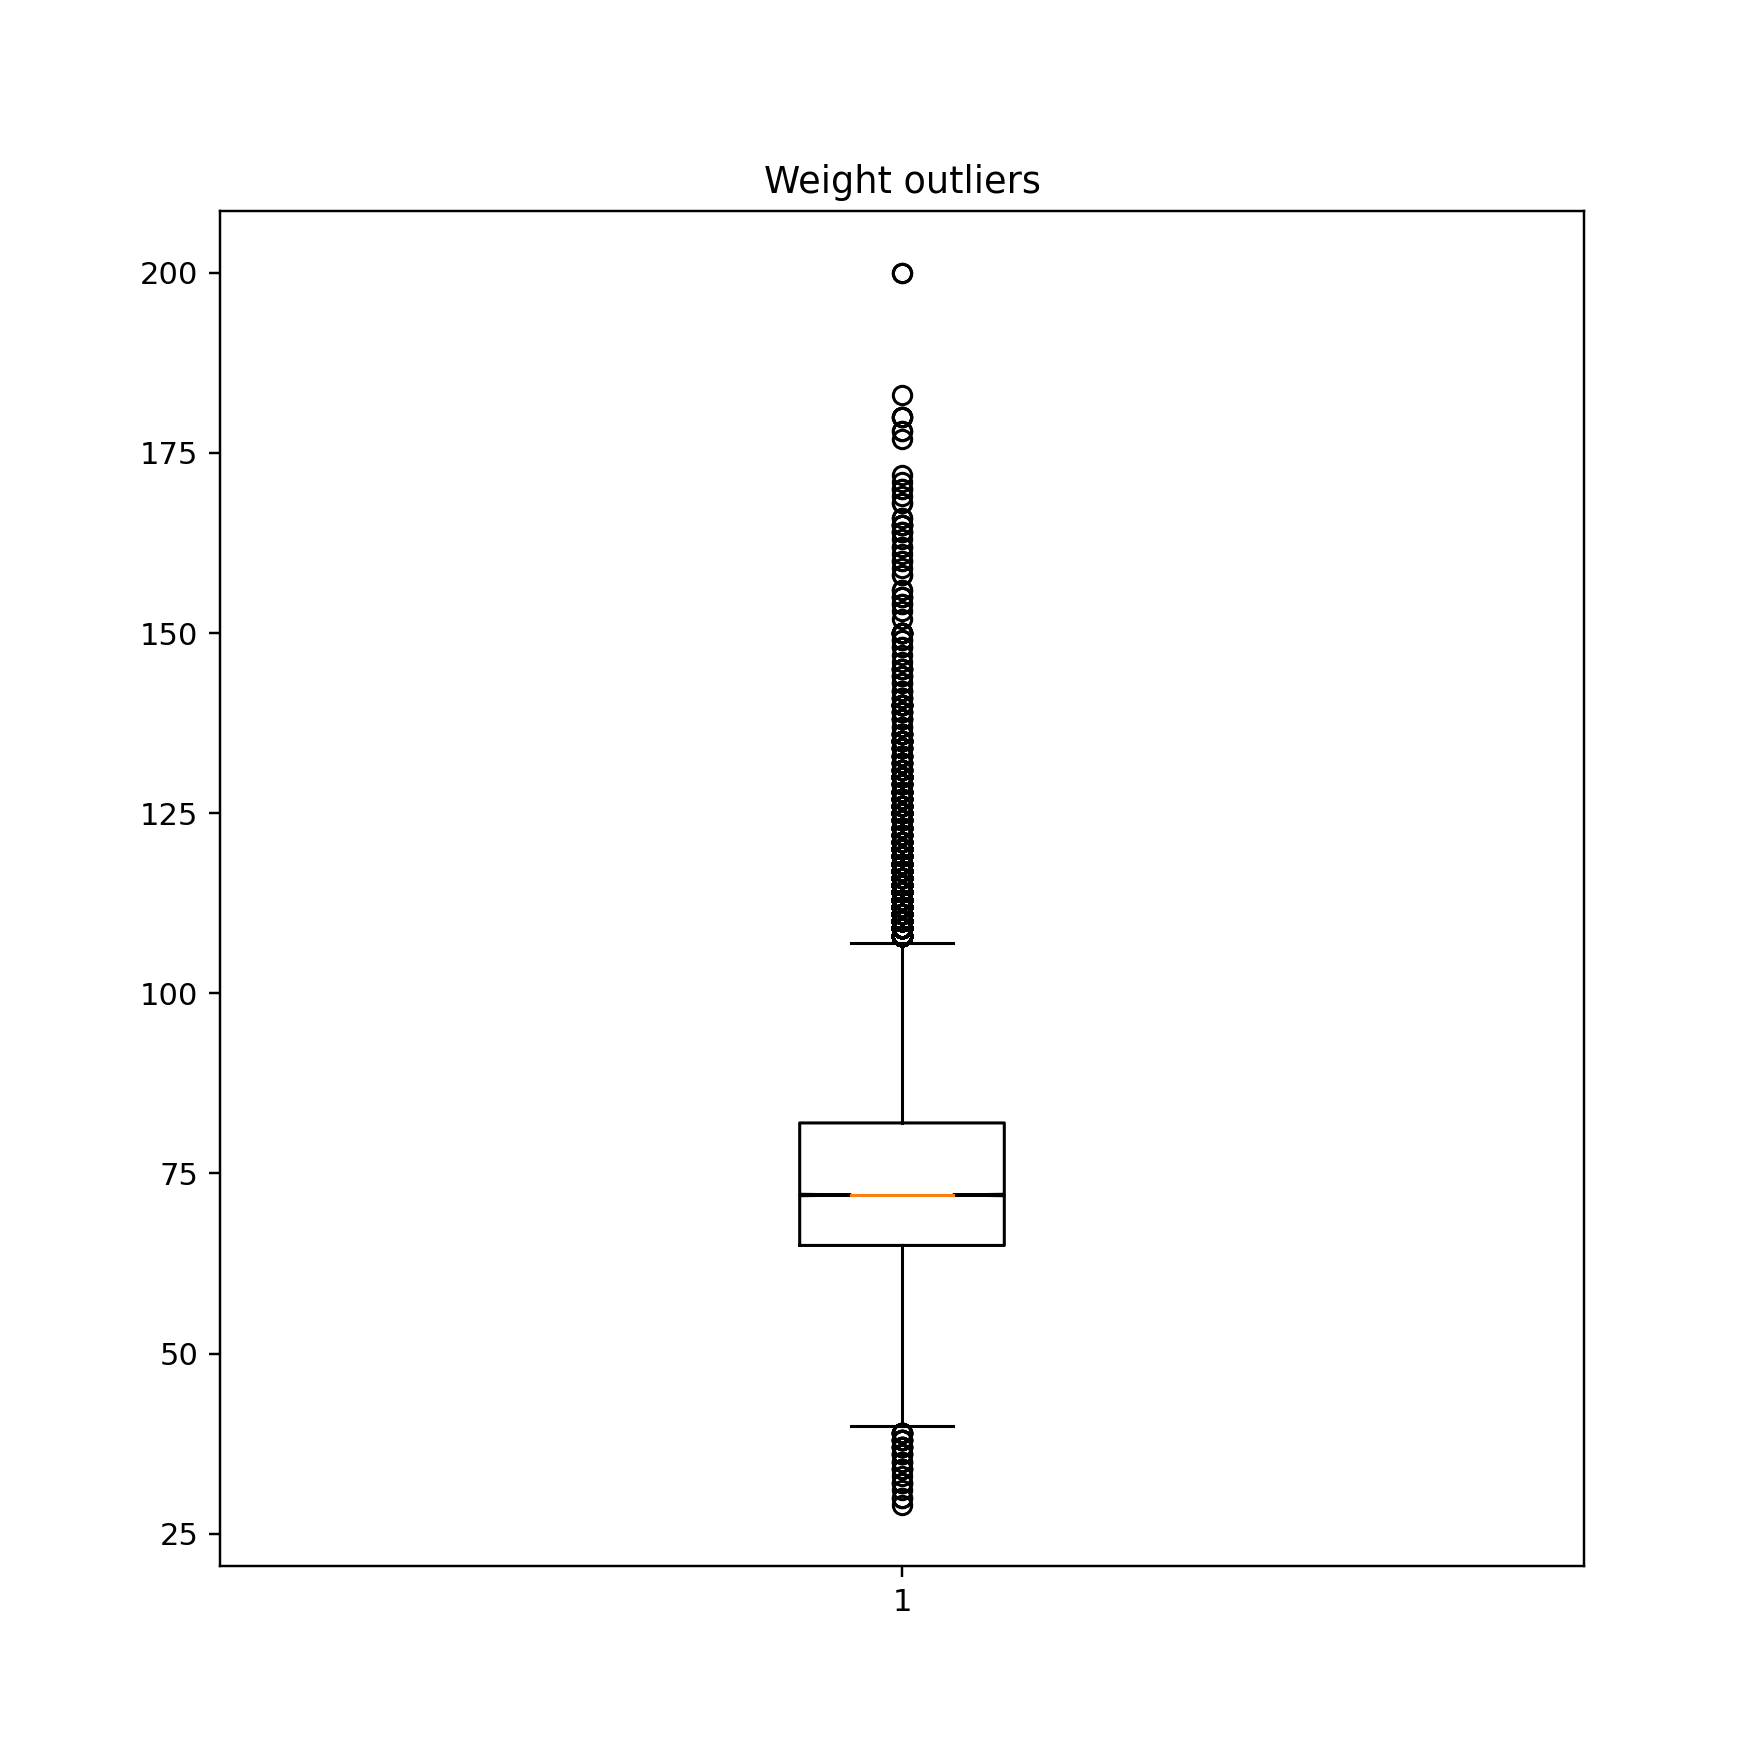

In [69]:
data = [cardio_df["weight"]]
fig1, ax1 = plt.subplots(figsize = (8,8))
ax1.set_title('Weight outliers')
ax1.boxplot(data, notch= True)
plt.show()

<IPython.core.display.Javascript object>


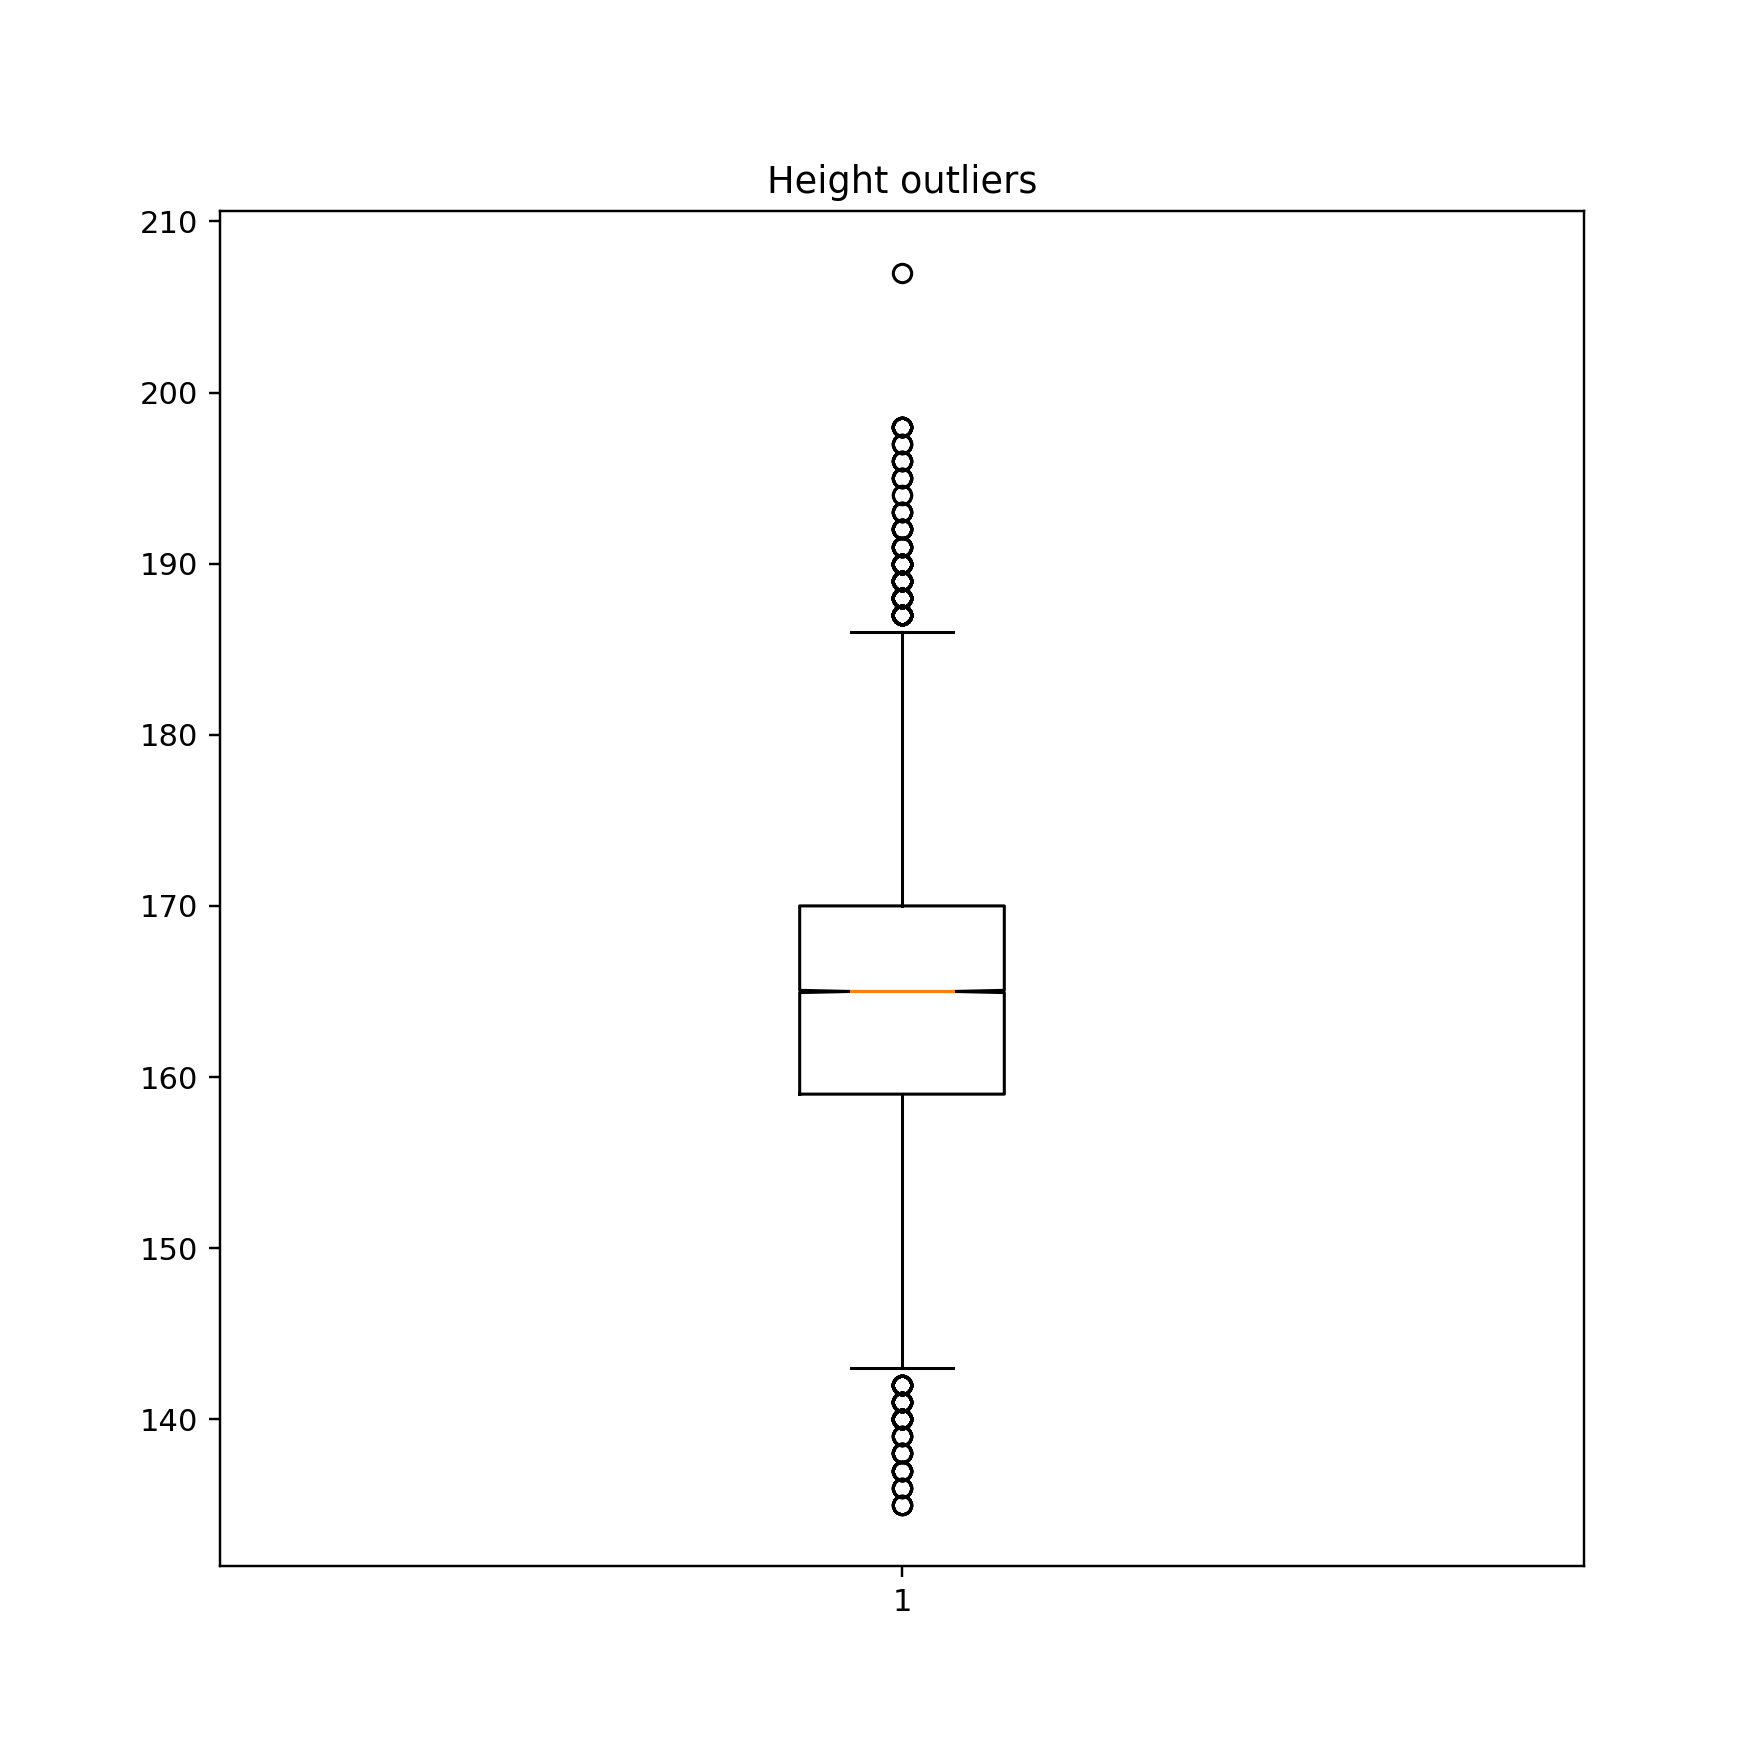

In [70]:
data = [cardio_df["height"]]
fig1, ax1 = plt.subplots(figsize = (8,8))
ax1.set_title('Height outliers')
ax1.boxplot(data, notch= True)
plt.show()

In [71]:
cholesterol_cardio_df = cardio_df["cardio"].groupby(cardio_df["cholesterol"]).mean()
cholesterol_cardio_df.head()

cholesterol
1    0.434299
2    0.594469
3    0.761380
Name: cardio, dtype: float64

<IPython.core.display.Javascript object>


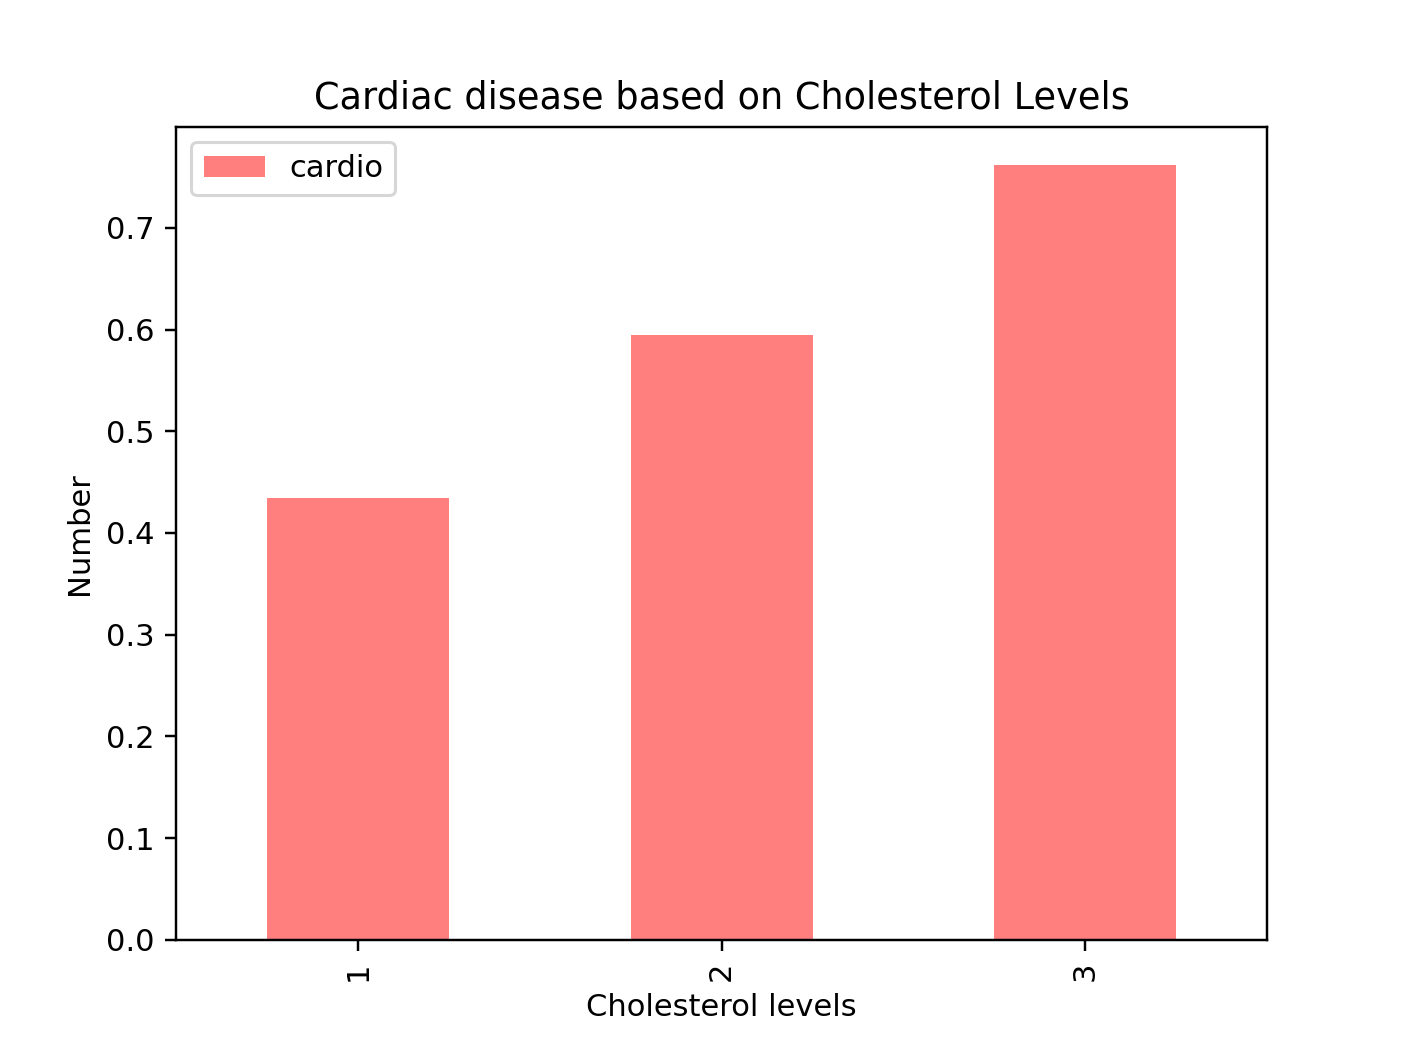

In [72]:
cholesterol_cardio_df.plot.bar(color='r', alpha=0.5, align="center")
# Create labels for the x and y axes.
plt.xlabel("Cholesterol levels")
plt.ylabel("Number")
# Create a title.
plt.title("Cardiac disease based on Cholesterol Levels")
# Add the legend.
plt.legend()

In [73]:
print(f" People with very high Cholesterol level have a greater chance of developing heart disease.")

 People with very high Cholesterol level have a greater chance of developing heart disease.


In [74]:
glucose_cardio_df = cardio_df["cardio"].groupby(cardio_df["glucose"]).mean()
glucose_cardio_df.head()

glucose
1    0.474391
2    0.584830
3    0.616438
Name: cardio, dtype: float64

<IPython.core.display.Javascript object>


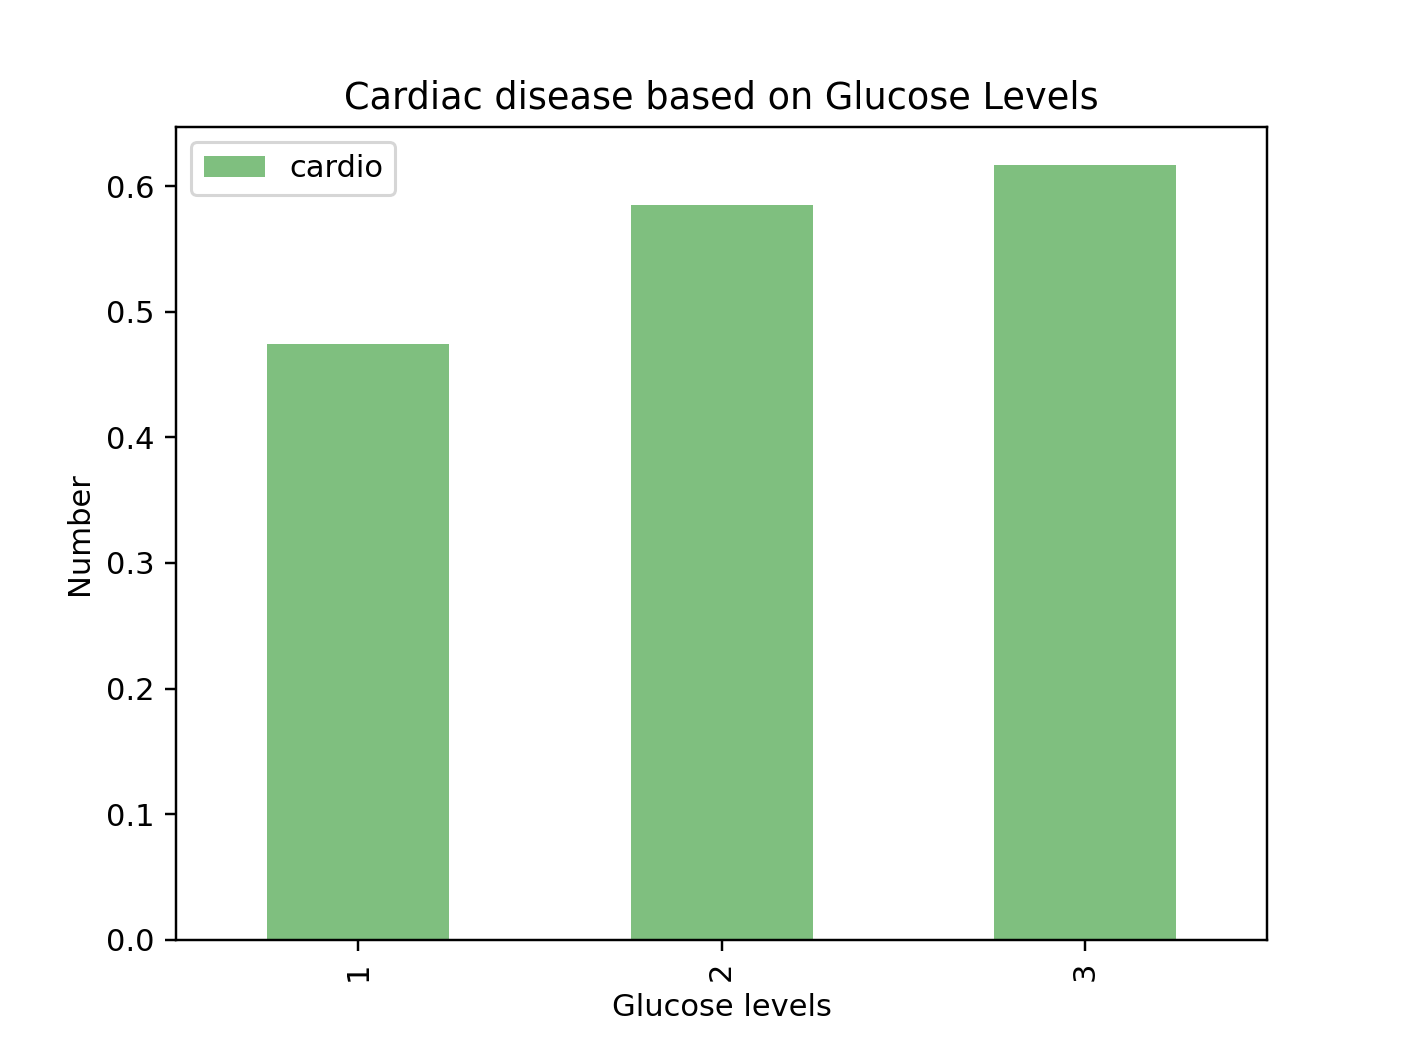

In [75]:
glucose_cardio_df.plot.bar(color='green', alpha=0.5, align="center")
# Create labels for the x and y axes.
plt.xlabel("Glucose levels")
plt.ylabel("Number")
# Create a title.
plt.title("Cardiac disease based on Glucose Levels")
# Add the legend.
plt.legend()

In [76]:
print(f" People with very high Glucose level have a greater chance of developing heart disease.")

 People with very high Glucose level have a greater chance of developing heart disease.


In [77]:
gender_cardio_df = cardio_df["cardio"].groupby(cardio_df["gender"]).mean()
gender_cardio_df.head()

gender
1    0.490967
2    0.497583
Name: cardio, dtype: float64

<IPython.core.display.Javascript object>


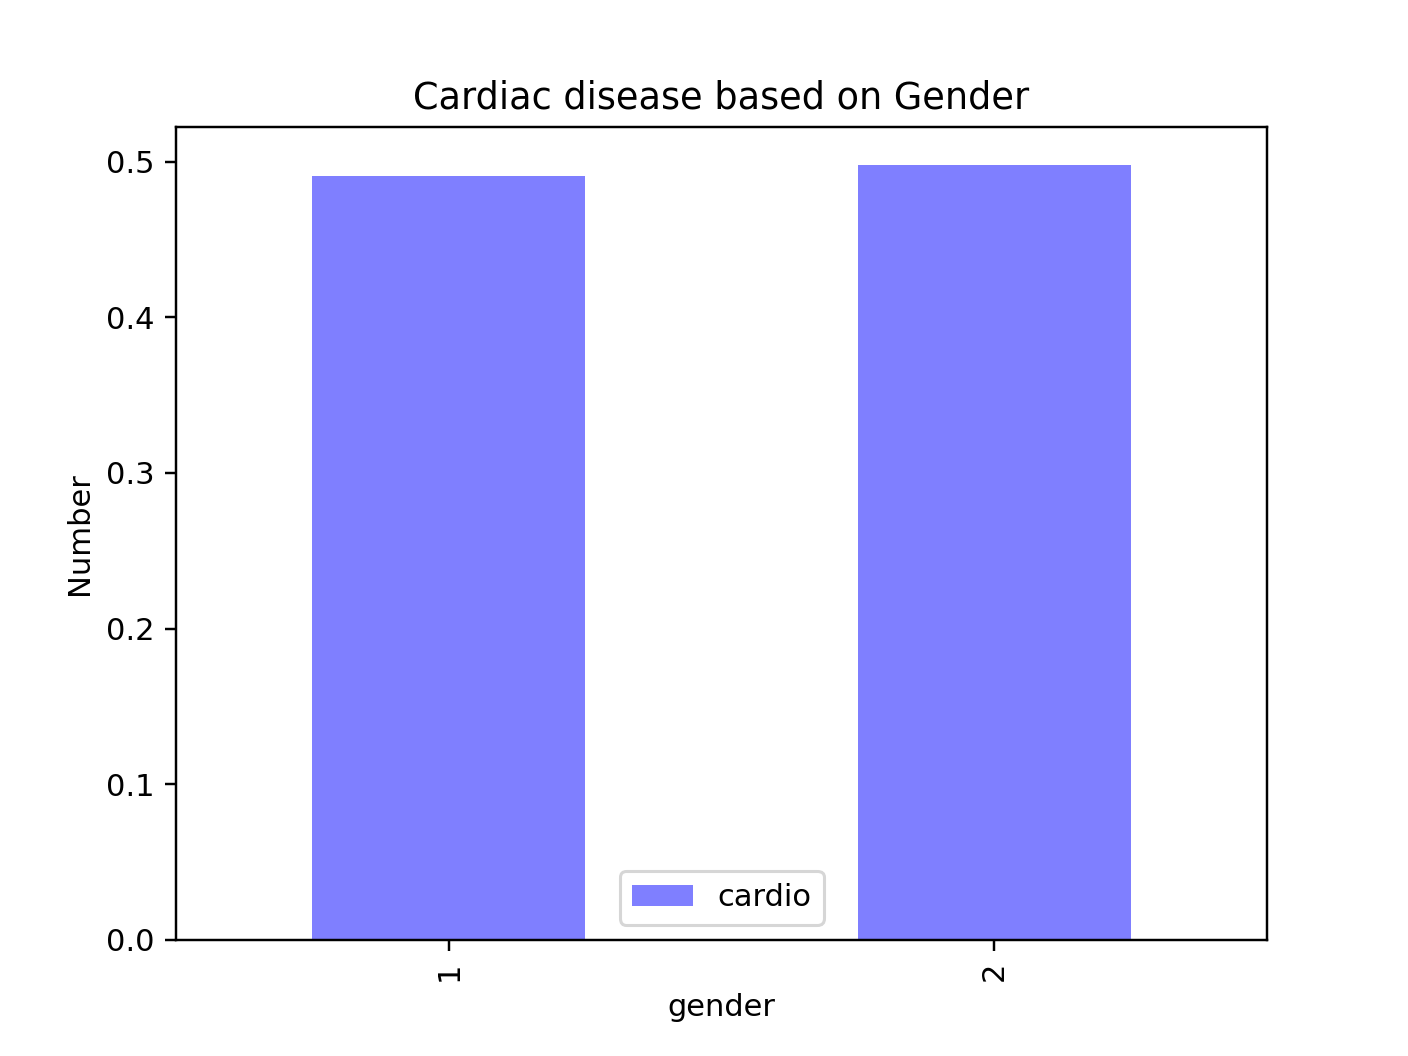

In [78]:
gender_cardio_df.plot.bar(color='blue', alpha=0.5, align="center")
# Create labels for the x and y axes.
plt.xlabel("gender")
plt.ylabel("Number")
# Create a title.
plt.title("Cardiac disease based on Gender")
# Add the legend.
plt.legend()

In [79]:
alcohol_cardio_df = cardio_df["cardio"].groupby(cardio_df["alcohol_intake"]).mean()
alcohol_cardio_df.head()

alcohol_intake
0    0.494356
1    0.473974
Name: cardio, dtype: float64

<IPython.core.display.Javascript object>


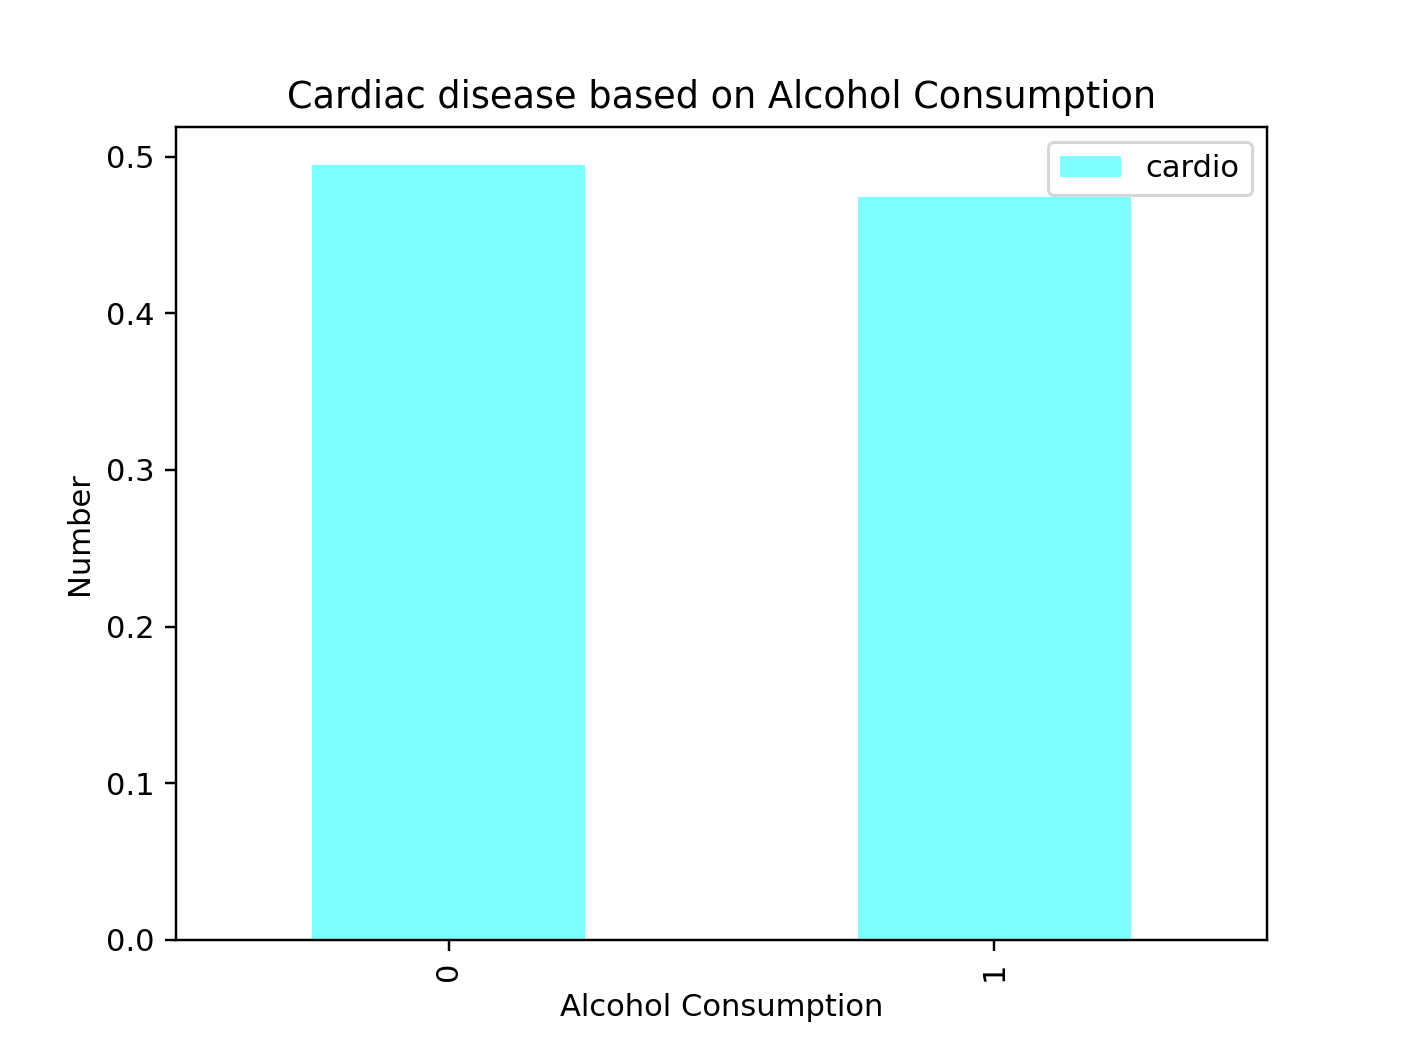

In [80]:
alcohol_cardio_df.plot.bar(color='cyan', alpha=0.5, align="center")
# Create labels for the x and y axes.
plt.xlabel("Alcohol Consumption")
plt.ylabel("Number")
# Create a title.
plt.title("Cardiac disease based on Alcohol Consumption")
# Add the legend.
plt.legend()

In [81]:
print(f" Alcohol consumption alone doesnot Contribute to developing heart disease.")

 Alcohol consumption alone doesnot Contribute to developing heart disease.
